# **Breast cancer detection**

*Prepared by* **Mr. Hemant Gautam & Mr. Jane Alam**

**Machine Learning**

Project- Analysing Breast Cancer using Python to make predictions.

**Introduction**

The aim of this project is to  to understand the process of organizing and preparing the data, selecting the features, choosing and applying the machine learning tools, comparing, selecting and improving the best models.

The features from the data set describe characteristics of the cell nuclei and are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. As described in UCI Machine Learning Repository, the attribute informations are:

**Attribute Information:**

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)



**Preparing the data**

We will start loading some of the packages that will help us organize and visualize the data. Other packages will be loaded as necessary.

In [63]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

**With help of Pandas we will load the data set**

In [5]:
path = "https://raw.githubusercontent.com/alamjane/Project/master/Breast%20Cancer.csv"
df = pd.read_csv(path)


df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


***As can bee seen above, except for the diagnosis (that is M = malignant or B = benign ) all other features are of type float64 and have 0 non-null numbers.***

In [6]:
# Drop useless variables
df = df.drop(['Unnamed: 32','id'], axis = 1)

# Reassign target
df.diagnosis.replace(to_replace = dict(M = 1, B = 0), inplace = True)

In [7]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


***We have converted diagnosis into 0 & 1. Here 'M' is 1 and 'B' is 0***

***Checking number of Rows & Columns***

In [8]:
df.shape

(569, 31)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

***Let's check missing values by using MSNO library***

In [10]:
import missingno as msno

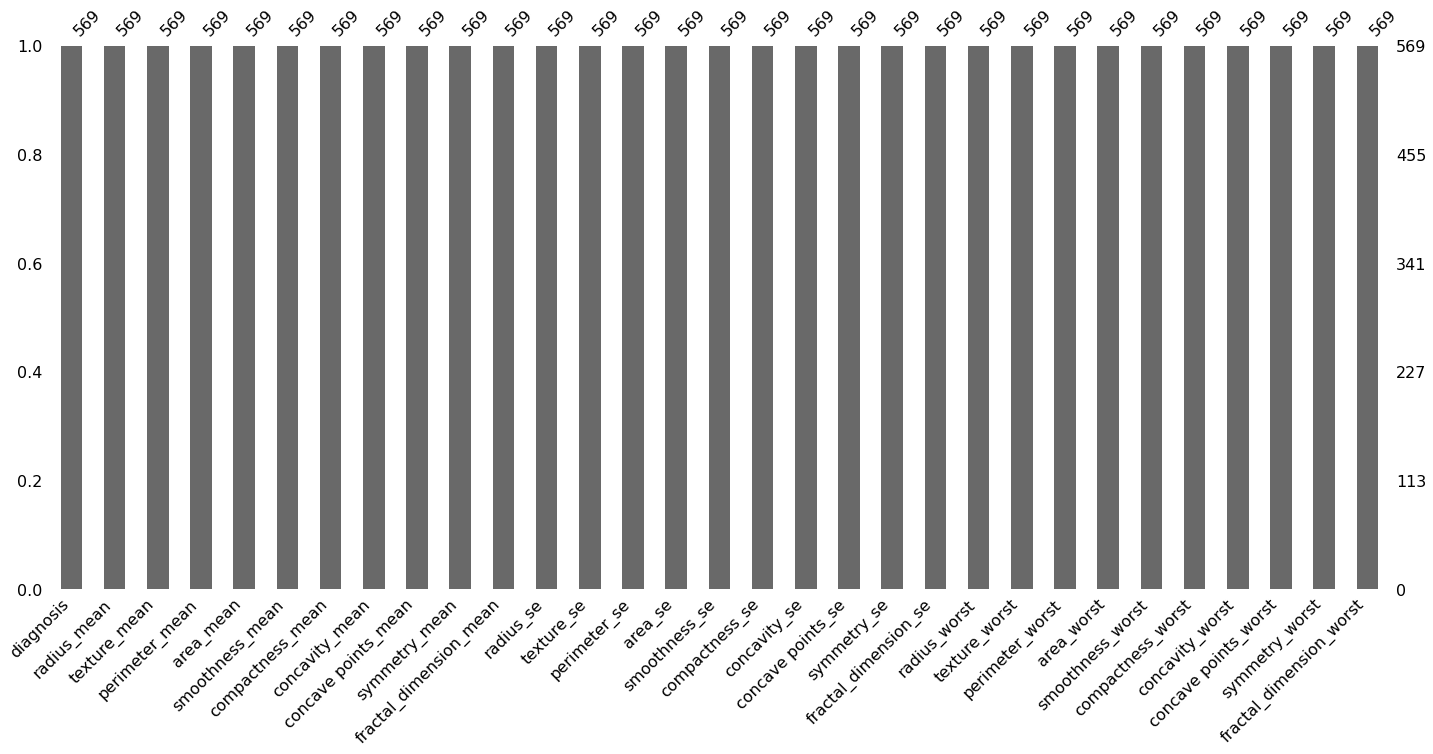

In [11]:
msno.bar(df)

In [12]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

***Summary of the Dataset***

To find Mean, Standard Deviation & Quartile range

In [13]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


**Exploratory data analysis(EDA)**

***Now we can count how many diagnosis are malignant (M) and how many are benign (B). This is done below.***

In [14]:
df['diagnosis'].value_counts(normalize=True)

0    0.627417
1    0.372583
Name: diagnosis, dtype: float64

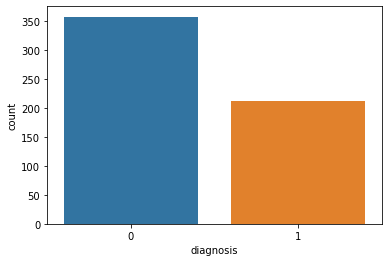

In [15]:
sns.countplot(x='diagnosis', data=df)

**Visualization**

In this section we will build visualizations of the data in order to decide how to proceed with the machine learning tools. To do that, we will need to use the Seaborn and the Matplotlib packages.

Using Seaborn to create a heat map of the correlations between the features

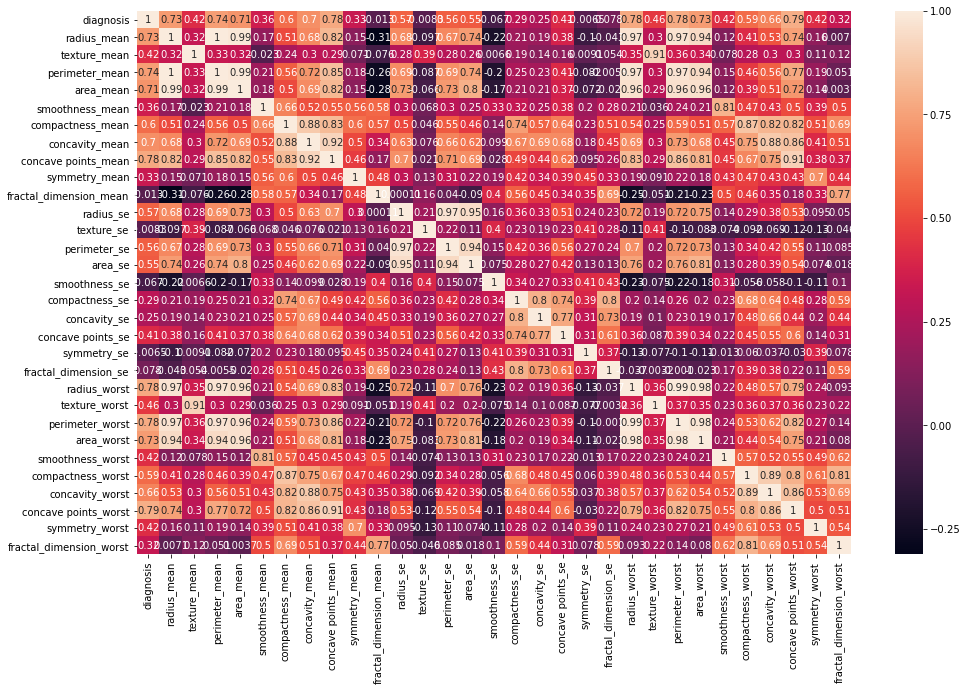

In [16]:
plt.figure(figsize=(16,10)) 
sns.heatmap(df.corr(), annot=True)

In [17]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

**Visualising selected features by Diagnosis:**

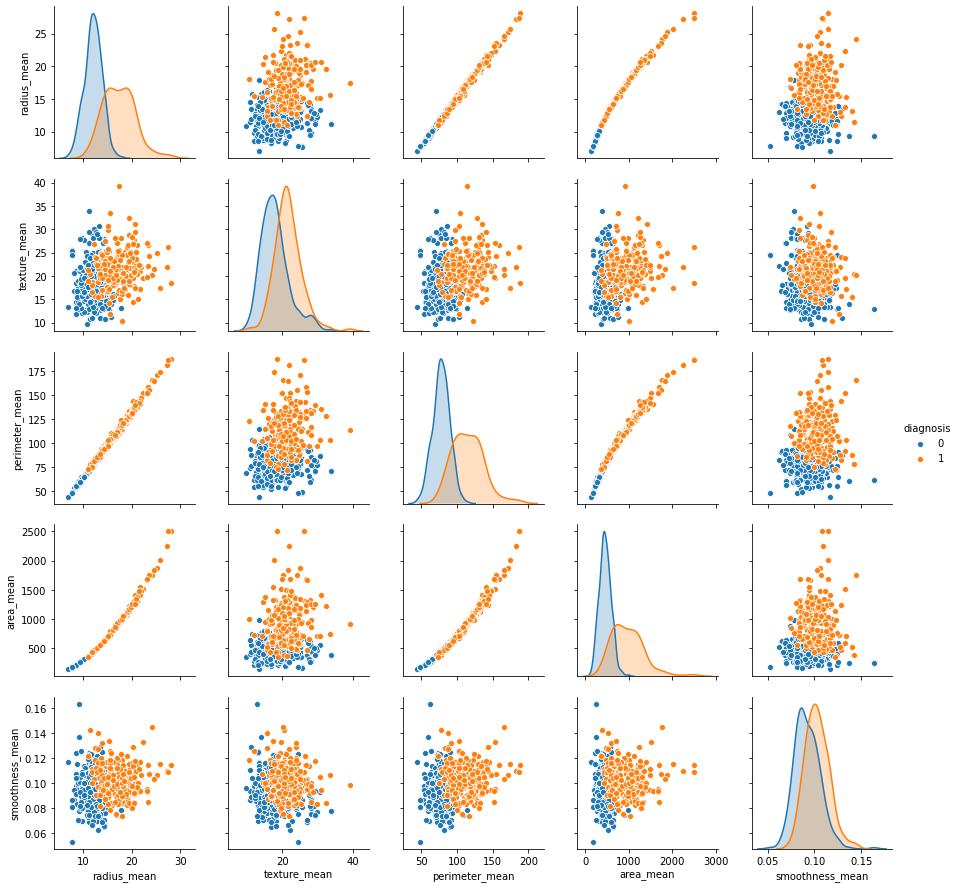

In [18]:

sns.pairplot(df, hue = 'diagnosis', vars = ['radius_mean', 'texture_mean', 'perimeter_mean','area_mean', 'smoothness_mean'])

**Comparing Radius mean and Smoothness mean by using Scatterplot**

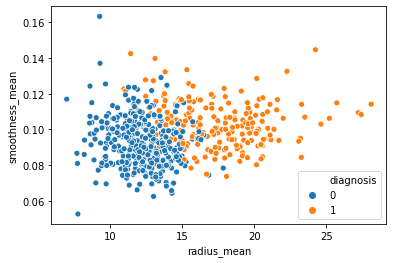

In [19]:
sns.scatterplot(x='radius_mean', y='smoothness_mean', hue='diagnosis', data = df)

In this section we will test and analyze machine learning algorithms for classification in order to identify if the tumor is malignant or benign based on the cell features. For this we will use Scikit-learn package. The necessary tools will be loaded as needed.

The problem we are dealing with here is a classification problem.

**EDA using SweetViz**

In [20]:
import sweetviz as sv

#analyzing the dataset
advert_report = sv.analyze(df)

#display the report
advert_report.show_html('breast_cancer_eda_using_sweetviz.html')

:FEATURES DONE:                    |                     | [  0%]   00:28  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [21]:
# Define input values, or X by dropping the target values:
X = df.drop(['diagnosis'], axis = 1)

# Define output values - this is the target:
y = df['diagnosis']

In order to avoid Overfitting we will use the function train_test_split to split the data randomly (random_state = 5) into a train and a test set. The test set will correspond to 20% of the total data (test_size = 0.2).

In [22]:
# For splitting data we will be using train_test_split from sklearn:
from sklearn.model_selection import train_test_split

In [23]:
# Splitting the data into test and train, we are testing on 0.2 = 20% of dataset:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

***Logistic Regression***

In [24]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()

In [25]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
y_predict = model.predict(X_test)

y_predict

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1], dtype=int64)

Confusion Matrix

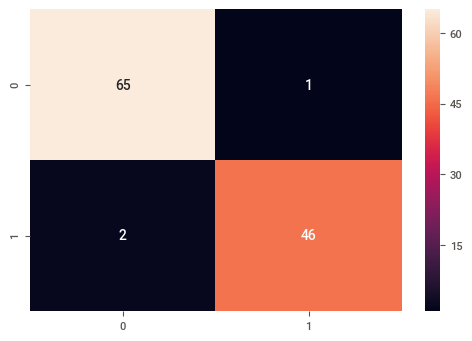

In [27]:
from sklearn.metrics import confusion_matrix

matrix= confusion_matrix(y_test, y_predict)

sns.heatmap(matrix,annot = True, fmt = "d")

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.9736842105263158

In [29]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98        66
           1       0.98      0.96      0.97        48

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



***Random Forest***

In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [31]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
predict = rfc.predict(X_test)

predict

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1], dtype=int64)

In [33]:
accuracy_score(y_test, predict)

0.9649122807017544

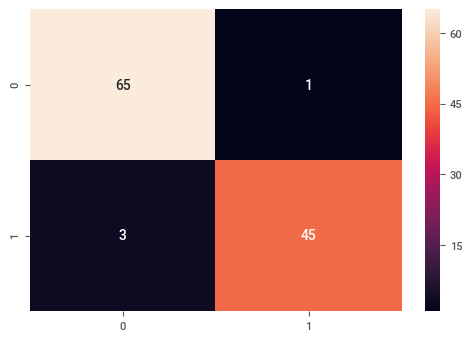

In [34]:
matrix= confusion_matrix(y_test, predict)

sns.heatmap(matrix,annot = True, fmt = "d")

In [35]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        66
           1       0.98      0.94      0.96        48

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



***SVM***

In [36]:
from sklearn.svm import SVC
clf = SVC()

In [37]:
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [38]:
pred = clf.predict(X_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

In [39]:
accuracy_score(y_test, pred)

0.5789473684210527

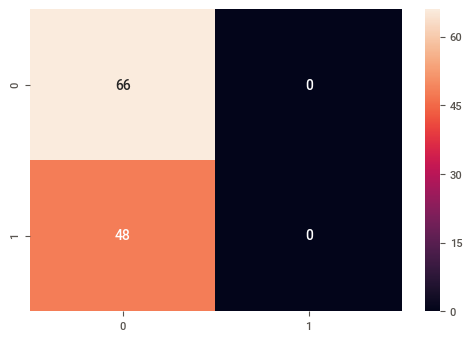

In [40]:
from sklearn.metrics import confusion_matrix

matrix= confusion_matrix(y_test, pred)

sns.heatmap(matrix,annot = True, fmt = "d")

In [41]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.58      1.00      0.73        66
           1       0.00      0.00      0.00        48

    accuracy                           0.58       114
   macro avg       0.29      0.50      0.37       114
weighted avg       0.34      0.58      0.42       114



***KNN***

In [42]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [43]:
y_pred = knn.predict(X_test)

y_pred

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1], dtype=int64)

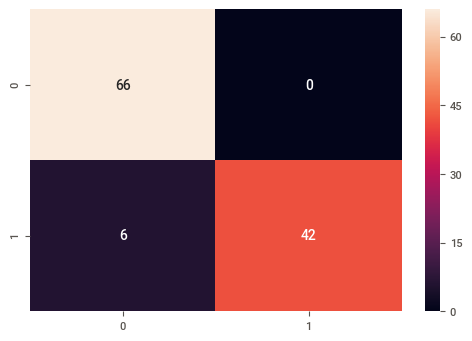

In [44]:
from sklearn.metrics import confusion_matrix

matrix= confusion_matrix(y_test, y_pred)

sns.heatmap(matrix,annot = True, fmt = "d")

In [45]:
accuracy_score(y_test, y_pred)

0.9473684210526315

In [46]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        66
           1       1.00      0.88      0.93        48

    accuracy                           0.95       114
   macro avg       0.96      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



**Conclusions**

We have found that Random Forest machine learning algorithm has better accuracy than other algorithms over the test dataset. This model has a Accuracy of 0.96

In [68]:
import pickle

# save the model to disk
filename = 'breast_cancer_model.pkl'
# pickle.dump(model, open(filename, 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
predict_value=loaded_model.predict([[
            12.34,22.22,79.85,464.5,0.10120,0.10150,0.05370,0.02822,0.1551,0.06761,0.2949,1.6560,1.955,21.55,0.011340,0.031750,0.03125,0.011350,0.01879,0.005348,13.58,28.68,87.36,553.0,0.1452,0.23380,0.16880,0.08194,0.2268,0.09082
        ]])
print(predict_value[0])

0
